<a href="https://colab.research.google.com/github/rohaan311299/CGM-Survey-Analysis/blob/main/DSPM_Prefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis==2.1.2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Importing the necessary libraries for the project.
import numpy as np # Library for numerical operations and array manipulation in Python.
import pandas as pd # Data manipulation library for working with structured data, primarily in tabular form.
import matplotlib.pyplot as plt # Data visualization library for creating various types of plots and charts.
import seaborn as sns # Statistical data visualization library based on Matplotlib, providing a higher-level interface for creating attractive and informative statistical graphics.
import missingno as msno # Library for visualizing missing data patterns in datasets
import re # Module for working with regular expressions in Python.

import nltk # Library for working with human language data, including text processing and sentiment analysis.
import random # Module that uses randomness.
from nltk.corpus import stopwords # Using Stopwords functionality.
from nltk.tokenize import word_tokenize # Using the word_tokenize functionality.
from nltk import bigrams, trigrams # Using the bigrams and trigrams functionality.
from nltk.probability import FreqDist # Using the FreeqDeist functionality.
from nltk.stem import PorterStemmer, WordNetLemmatizer # Using the PorterStemmer and WordNetLemmatizer for stemmazition and lemmatizion.

from nltk.sentiment.vader import SentimentIntensityAnalyzer # Using the SentimentIntensityAnalsyser for Sentiment Analysis.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from collections import Counter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: ignored

In [ ]:
pyLDAvis.enable_notebook()

#### Importing the Dataset given by the professor in Canvas

In [ ]:
df = pd.read_excel("Diabetes Continuous Glucose Monitoring – Data Export.xlsx") # Importing the dataset using the read_excel since the data is in excel format.

#### Checking out the top 5 entries of the dataset.

In [ ]:
df.head() # Prints out the top 5 entries as defualt.

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,...,LexisNexis Company - Any,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,NaN,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,NaN,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,https://scontent-iad3-1.cdninstagram.com/v/t51...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,NaN,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking out the dataset information for better understanding.

In [ ]:
df.info() # Prints out all the columns information, their datatype and the number of missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      37844 non-null  object 
 1   Sound Bite Text                              37844 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        36273 non-null  object 
 4   Source Type                                  37844 non-null  object 
 5   Post Type                                    35165 non-null  object 
 6   Is Paid                                      37844 non-null  object 
 7   Media Type                                   37844 non-null  object 
 8   URL                                          37844 non-null  object 
 9   Media Link                                   1253 non-null   object 
 10

As we can observe from the data, that there are mulitple columns with null values and also there are many columns where there is missing value, we will explore more on this further.

#### Checking the missing values using the msno library for better visualization.

<Axes: >

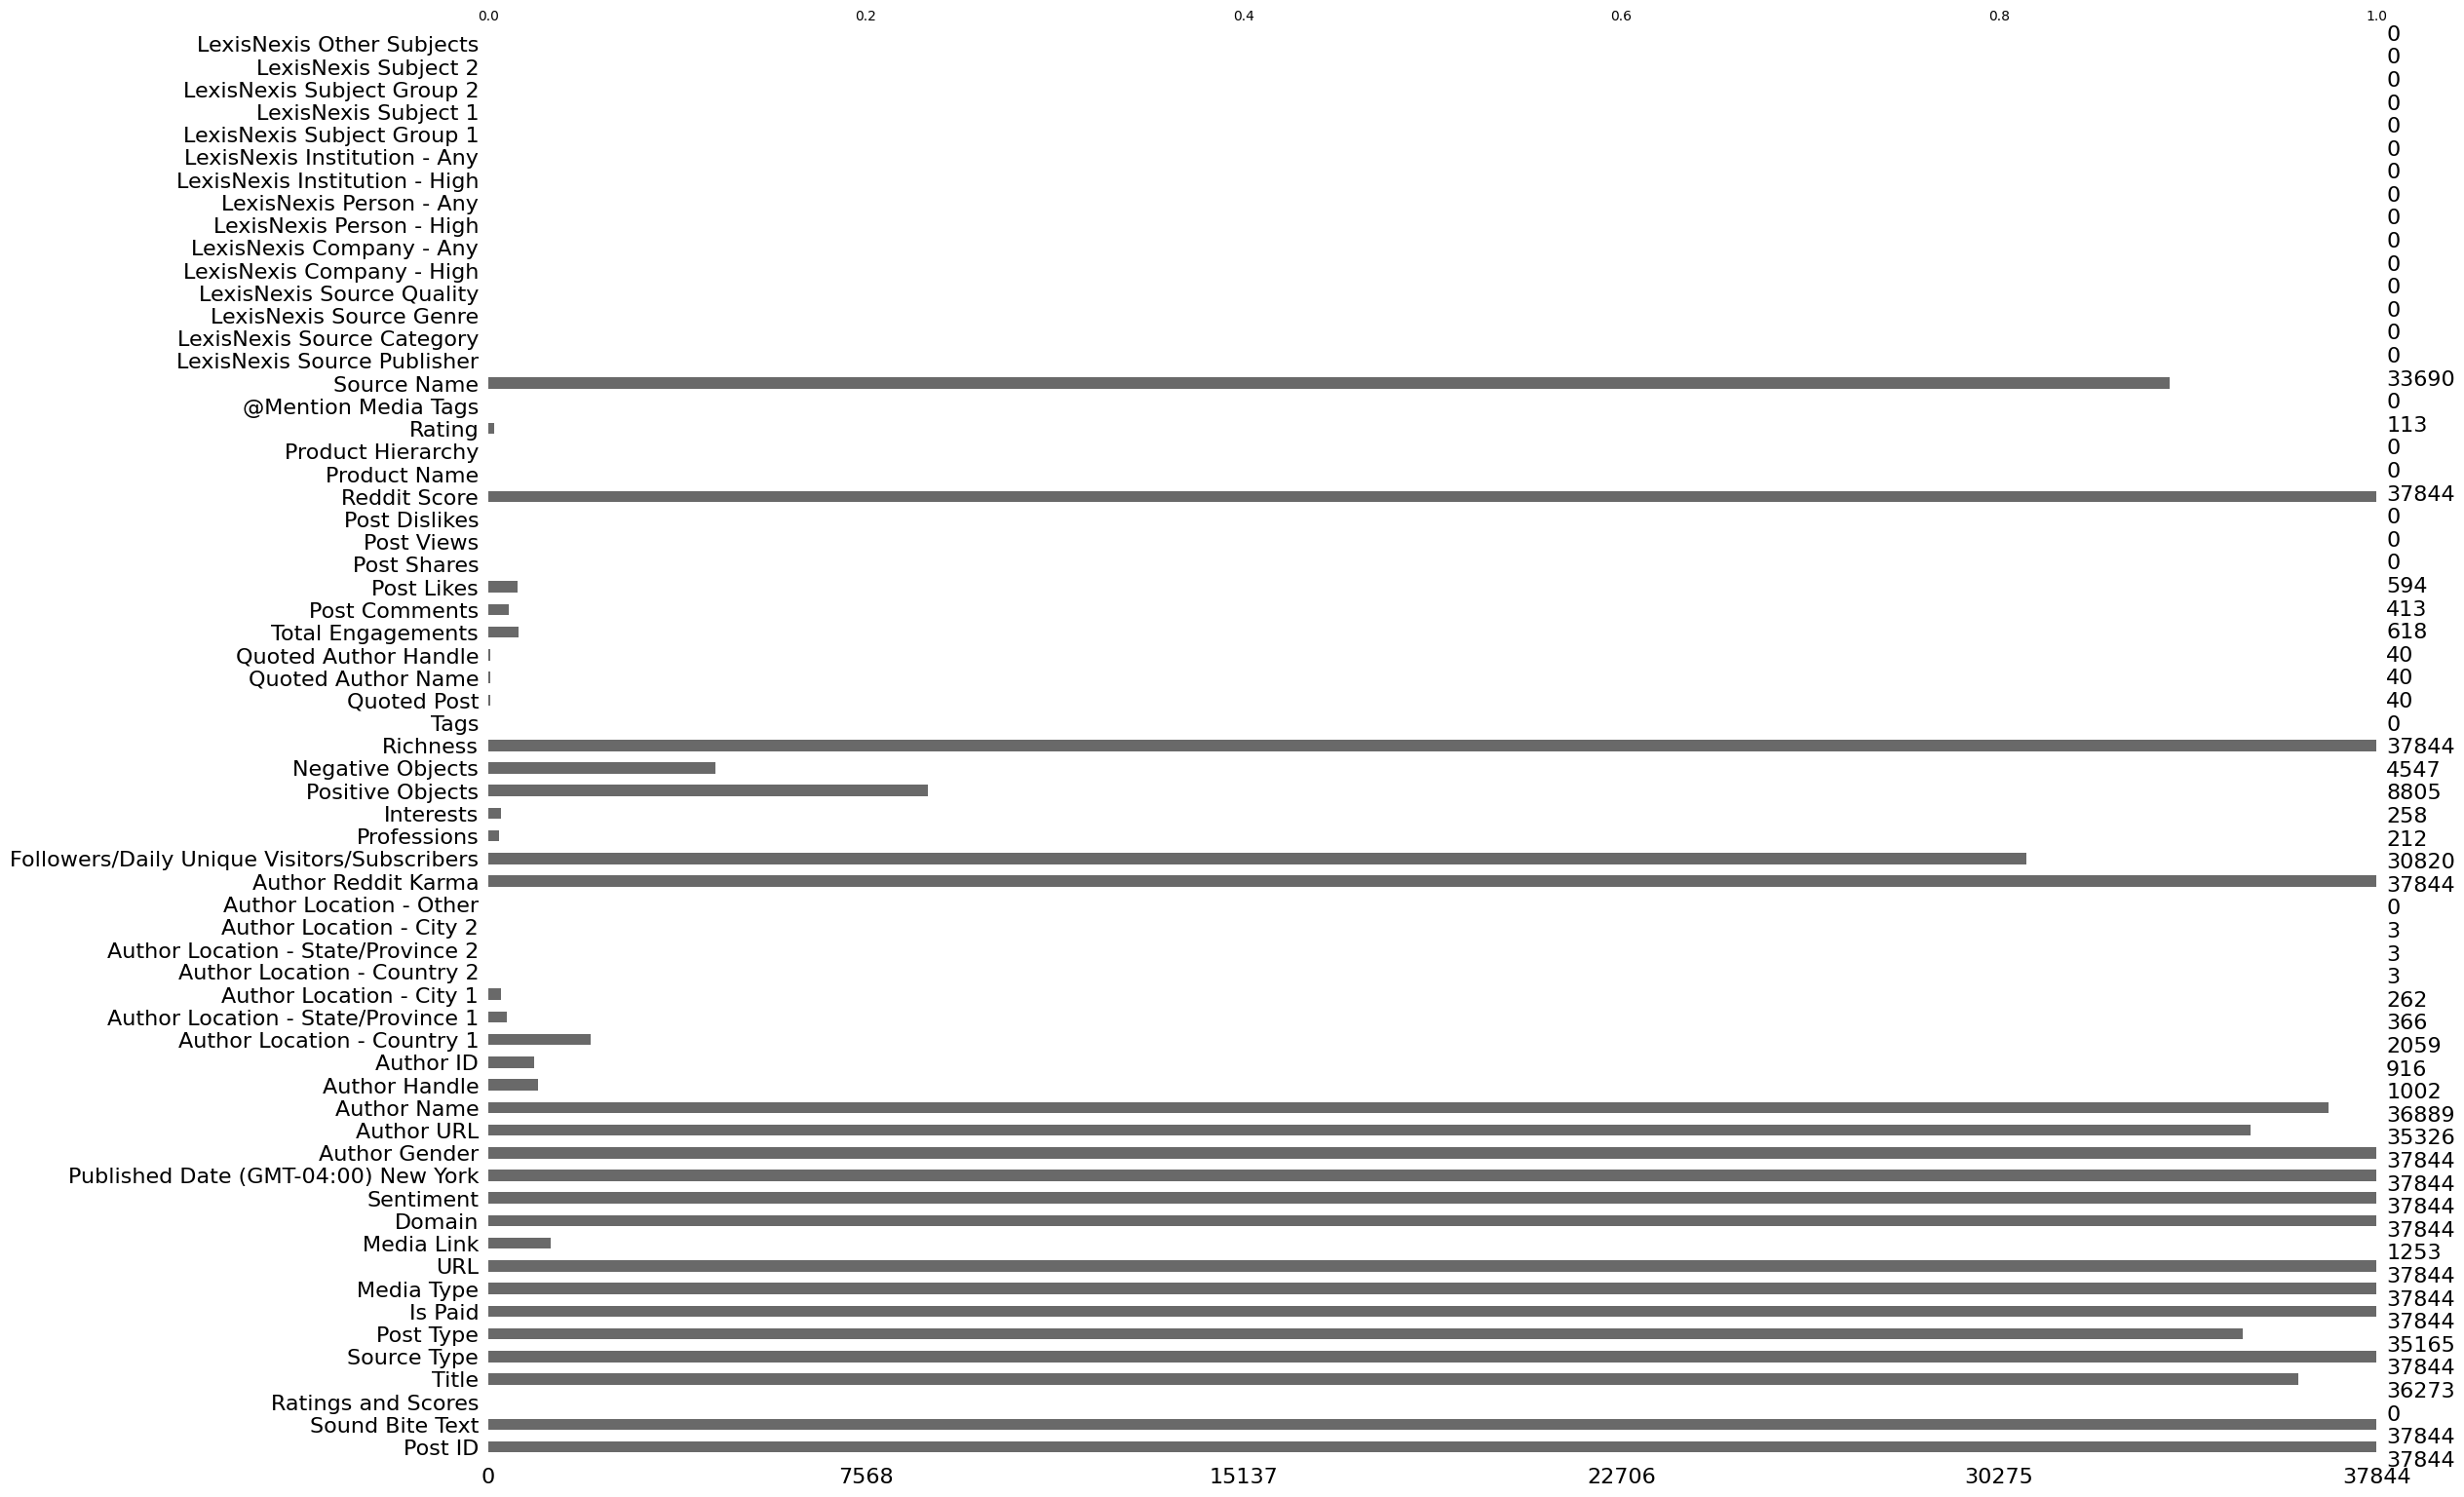

In [ ]:
msno.bar(df) #  Plots the missing entries as a bar chart.

#### Checking the missing value using the isnull() method.

In [ ]:
df.isnull().sum() # Prints out the sum of missing numbers in each column.

Post ID                           0
Sound Bite Text                   0
Ratings and Scores            37844
Title                          1571
Source Type                       0
                              ...  
LexisNexis Subject Group 1    37844
LexisNexis Subject 1          37844
LexisNexis Subject Group 2    37844
LexisNexis Subject 2          37844
LexisNexis Other Subjects     37844
Length: 63, dtype: int64

#### Checking out the shape of the dataset for the general understanding.

In [ ]:
df.shape # Prints out the shape of the dataset.

(37844, 63)

####

In [ ]:
df.columns # Print out the column names

Index(['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title',
       'Source Type', 'Post Type', 'Is Paid', 'Media Type', 'URL',
       'Media Link', 'Domain', 'Sentiment',
       'Published Date (GMT-04:00) New York', 'Author Gender', 'Author URL',
       'Author Name', 'Author Handle', 'Author ID',
       'Author Location - Country 1', 'Author Location - State/Province 1',
       'Author Location - City 1', 'Author Location - Country 2',
       'Author Location - State/Province 2', 'Author Location - City 2',
       'Author Location - Other', 'Author Reddit Karma',
       'Followers/Daily Unique Visitors/Subscribers', 'Professions',
       'Interests', 'Positive Objects', 'Negative Objects', 'Richness', 'Tags',
       'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle',
       'Total Engagements', 'Post Comments', 'Post Likes', 'Post Shares',
       'Post Views', 'Post Dislikes', 'Reddit Score', 'Product Name',
       'Product Hierarchy', 'Rating', '@Mention Media Tags'

In [ ]:
columns_to_be_dropped = ['LexisNexis Source Publisher', 'LexisNexis Source Category','LexisNexis Source Genre', 'LexisNexis Source Quality','LexisNexis Company - High', 'LexisNexis Company - Any','LexisNexis Person - High', 'LexisNexis Person - Any','LexisNexis Institution - High', 'LexisNexis Institution - Any','LexisNexis Subject Group 1', 'LexisNexis Subject 1','LexisNexis Subject Group 2', 'LexisNexis Subject 2','LexisNexis Other Subjects','@Mention Media Tags',"Product Name",'Product Hierarchy','Author Handle', 'Author ID','Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2','Author Location - State/Province 2', 'Author Location - City 2','Author Location - Other',"Ratings and Scores", "Is Paid"]
dropped_data = df.drop(columns_to_be_dropped,axis = 1) # Dropping the columns and reinitating the dataset to the newer one.

In [ ]:
# Plotting the non null values dataset to get an idea of how many columns are there for non null values.
threshold = 37844 ## the total number of entries.
dataset_reduced = df.dropna(axis=1, thresh=threshold).copy()

<Axes: >

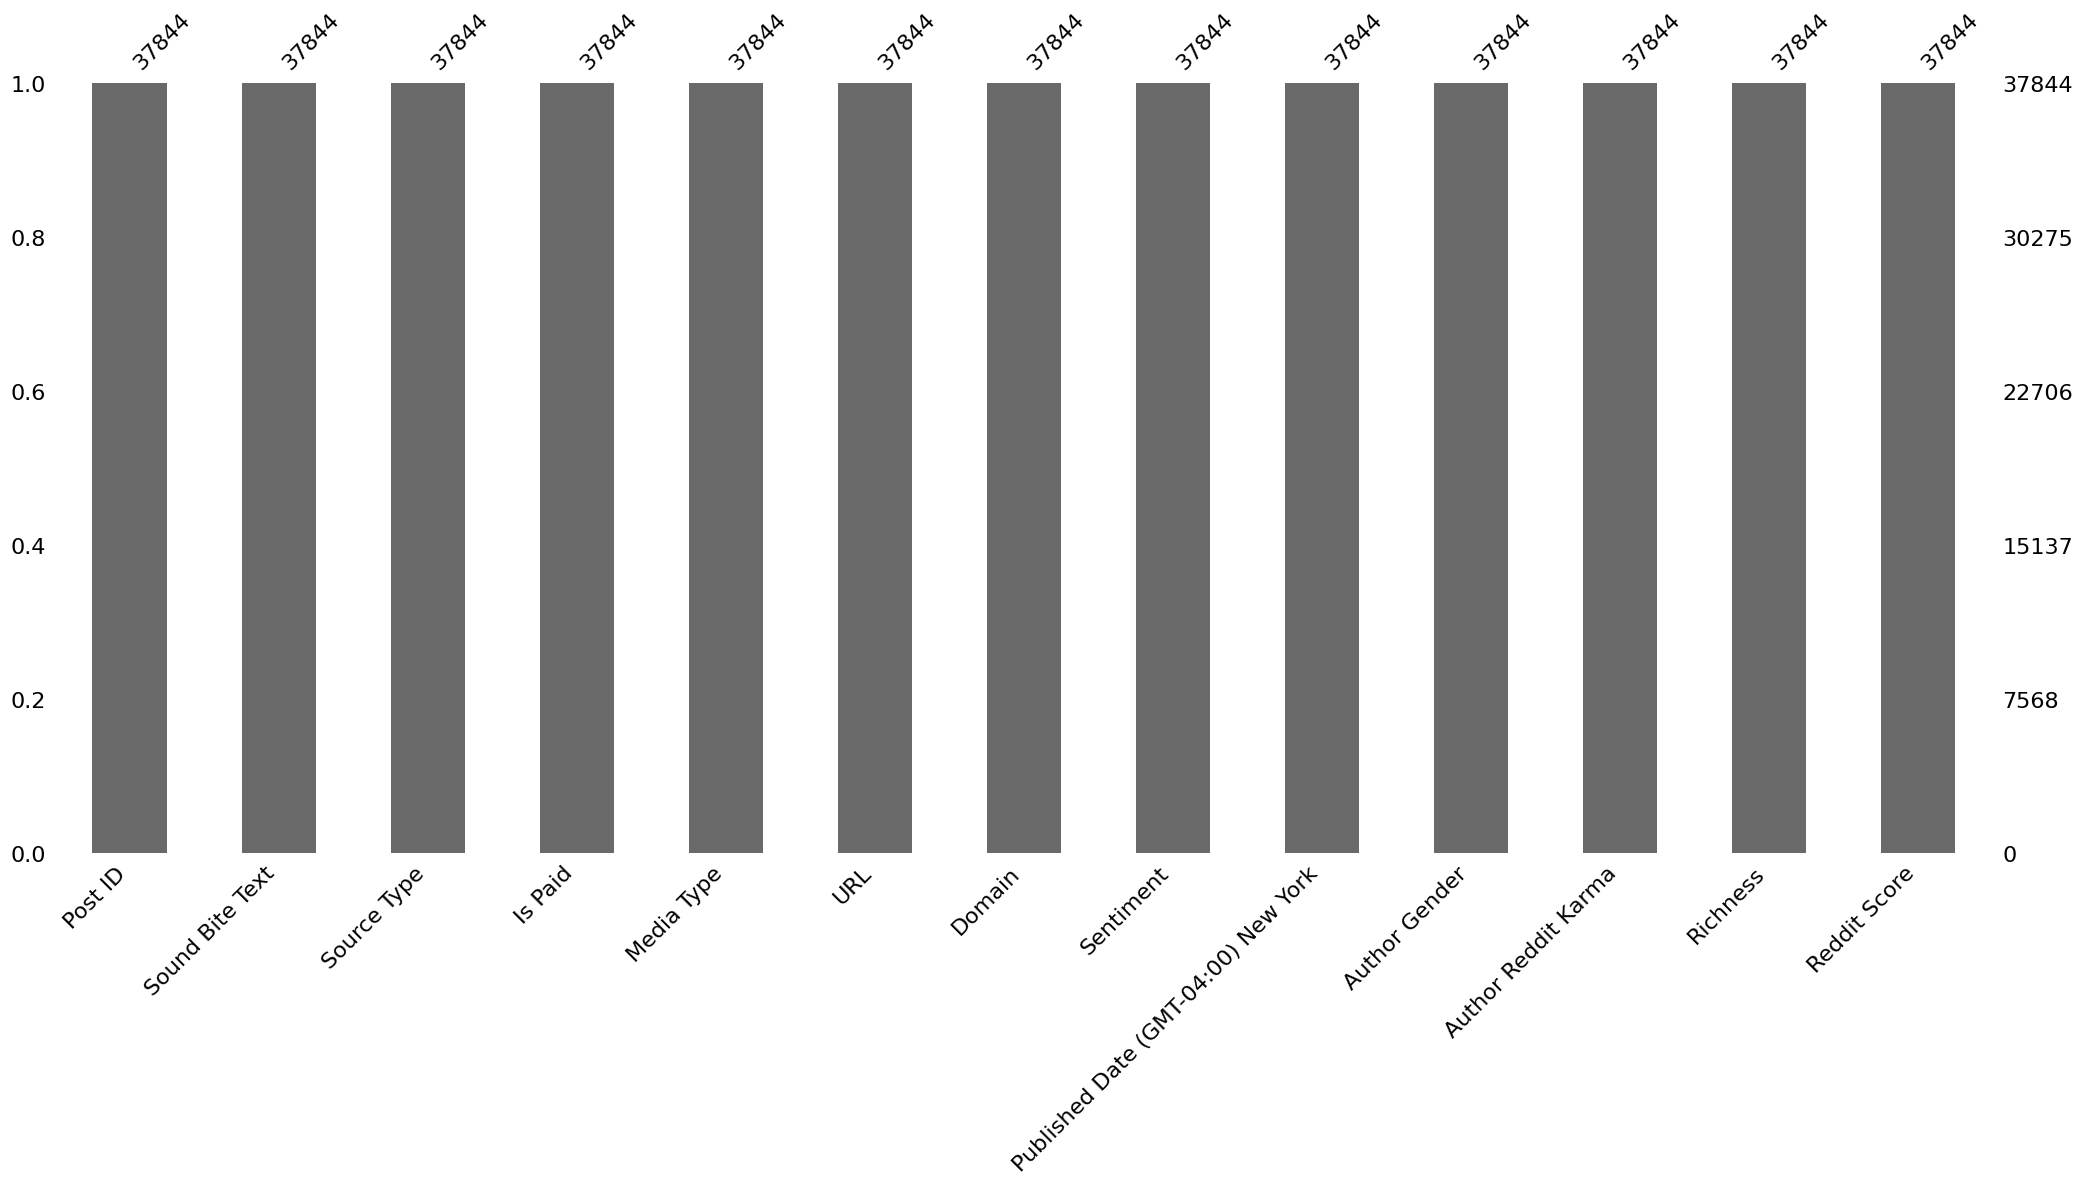

In [ ]:
msno.bar(dataset_reduced) # Plotting the missing number of the entries in the column.

As we can observe from the graph above, that there are 13 columns which have no null values.

In [ ]:
df_row_dropped = dataset_reduced.copy() # copy dataframe
df_row_dropped.info() # view info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Post ID                              37844 non-null  object
 1   Sound Bite Text                      37844 non-null  object
 2   Source Type                          37844 non-null  object
 3   Is Paid                              37844 non-null  object
 4   Media Type                           37844 non-null  object
 5   URL                                  37844 non-null  object
 6   Domain                               37844 non-null  object
 7   Sentiment                            37844 non-null  object
 8   Published Date (GMT-04:00) New York  37844 non-null  object
 9   Author Gender                        37844 non-null  object
 10  Author Reddit Karma                  37844 non-null  object
 11  Richness                             3784

In [ ]:
df_row_dropped["Source Type"].unique() # to view the unique values present in the column

array(['Forums', 'Twitter', 'Instagram', 'Blogs', 'Comments', 'Facebook'],
      dtype=object)

In [ ]:
df_row_dropped['Sound Bite Text'] = df_row_dropped['Sound Bite Text'].str.lower() # converting it to lowercase

In [ ]:
# make a function to clean text by removing urls from the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # Convert to lowercase
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text
# apply clean text to the column
df_row_dropped['Sound Bite Text'] = df_row_dropped['Sound Bite Text'].apply(clean_text)

In [ ]:
# Remove hashtags from the text
def remove_tag(text):
    punc_pattern = r'#\w+'
    return re.sub(punc_pattern, '', text)

df_row_dropped['Sound Bite Text'] = df_row_dropped['Sound Bite Text'].apply(remove_tag)

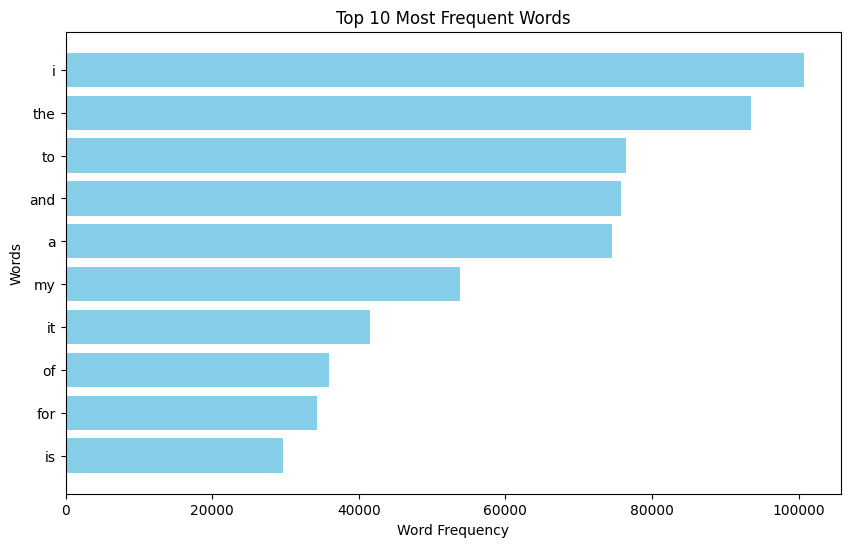

In [ ]:
# Concatenate all the narratives into a single string
all_narratives = ' '.join(df_row_dropped['Sound Bite Text'])

# Tokenize the text and count word frequencies
word_counts = Counter(all_narratives.split())

# Convert the word counts into a list of tuples for sorting
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top N words and their counts
top_words = [word for word, count in sorted_word_counts[:10]]
top_counts = [count for word, count in sorted_word_counts[:10]]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_counts, color='skyblue')
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()

In [ ]:
nltk.download('stopwords') # Downloading the stopwords, to use in the code.
nltk.download('punkt') # Downloading the punctuation, to use in the code.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Handling stopwards
#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the text data
all_narratives = ' '.join(df_row_dropped['Sound Bite Text']) # This concatenates all the text data from the 'Sound Bite Text' column of the DataFrame
words = word_tokenize(all_narratives) # It tokenizes the all_narratives string into a list of words using NLTK's word_tokenize function.
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Now 'words' contains the preprocessed text data without stopwords

# Generate bigrams and trigrams
bigram_list = list(bigrams(words))
trigram_list = list(trigrams(words))

# Calculate frequencies of bigrams and trigrams
bigram_freq = FreqDist(bigram_list)
trigram_freq = FreqDist(trigram_list)

# Print most common bigrams and trigrams
print("Top 10 most common bigrams:")
print(bigram_freq.most_common(10))

print("\nTop 10 most common trigrams:")
print(trigram_freq.most_common(10))

Top 10 most common bigrams:
[(('blood', 'sugar'), 5616), (('freestyle', 'libre'), 4845), (('continuous', 'glucose'), 3826), (('glucose', 'monitor'), 2998), (('insulin', 'pump'), 1615), (('pump', 'cgm'), 1496), (('blood', 'glucose'), 1371), (('blood', 'sugars'), 1012), (('glucose', 'monitoring'), 998), (('dexcom', 'cgm'), 936)]

Top 10 most common trigrams:
[(('continuous', 'glucose', 'monitor'), 2617), (('continuous', 'glucose', 'monitoring'), 764), (('blood', 'sugar', 'levels'), 492), (('using', 'freestyle', 'libre'), 392), (('continuous', 'glucose', 'monitors'), 390), (('use', 'freestyle', 'libre'), 378), (('glucose', 'monitor', 'cgm'), 368), (('insulin', 'pump', 'cgm'), 317), (('cgm', 'continuous', 'glucose'), 310), (('low', 'blood', 'sugar'), 304)]


In [ ]:
# This are the most frequent words found, which needs to be removed.
frequent_words = ["theyre","I", "it", "U", "You", "He", "We", "They", "It", "She", "is", "was", "s","repost","➖"]
def remove_frequent_words(text):
    # Split the tweet into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words and word.lower() not in stop_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
df_row_dropped['Sound Bite Text'] = df_row_dropped['Sound Bite Text'].apply(remove_frequent_words)

In [ ]:
# Extract 10 random samples
sample_df = df_row_dropped.sample(n=5)

sample_text = []
for i, row in sample_df.iterrows():
    text = f"Medical Post {i+1}: {row['Sound Bite Text']}"
    sample_text.append(text)
print('\n\n'.join(sample_text))

Medical Post 37327: dont know available think one popular sensors america dexcom thats use generally really like plus new model coming year even better

Medical Post 13028: im climbing kilimanjaro october t1d life 30 year old male manage diabetes cgm multiple daily injections good control pretty active climbingrunning ultrasweight lifting etc ive hiked 14ers us didnt experience material changes diabetes standpoint altitude sickness kilimanjaro another vertical mile

Medical Post 11283: yeah think may need adjusted breakfast got low said dexcom low fixed went gym hour later low around 60s

Medical Post 13305: 3 4 times week ive felt like really low like point almost passing ive ever actually experienced checked bg finger stick also dexcom reading fine time found fine means symptoms fake anyone else experienced anything

Medical Post 28431: another dme ccs medical get cgm pump hardware


In [ ]:
nltk.download('wordnet') # Downloading the wordnet for the code.

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Perform stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # Perform lemmatization (using WordNet Lemmatizer)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the processed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)
    lemmatized_text = ' '.join(lemmatized_words)

    return stemmed_words, lemmatized_words

# Apply the preprocessing function to the 'Sound Bite Text' column
df_row_dropped['Stemmed Text'], df_row_dropped['Lemmatized Text'] = zip(*df_row_dropped['Sound Bite Text'].apply(preprocess_text))

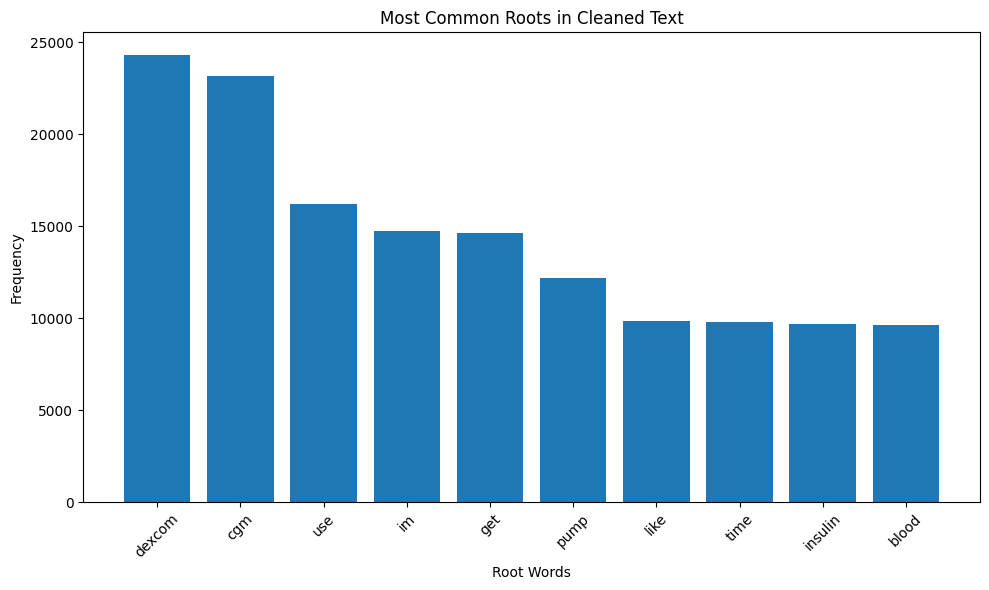

In [ ]:
# importing the counter from collections library.
from collections import Counter

cleaned_words_stemmed = [stem for stems_list in df_row_dropped['Stemmed Text'] for stem in stems_list]

# Use Counter to count the frequency of each root
word_freq = Counter(cleaned_words_stemmed)

# Get the most common roots
most_common_roots = word_freq.most_common(10)

# Extract the roots and their frequencies for plotting
roots, frequencies = zip(*most_common_roots)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(roots, frequencies)
plt.xlabel('Root Words')
plt.ylabel('Frequency')
plt.title('Most Common Roots in Cleaned Text')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

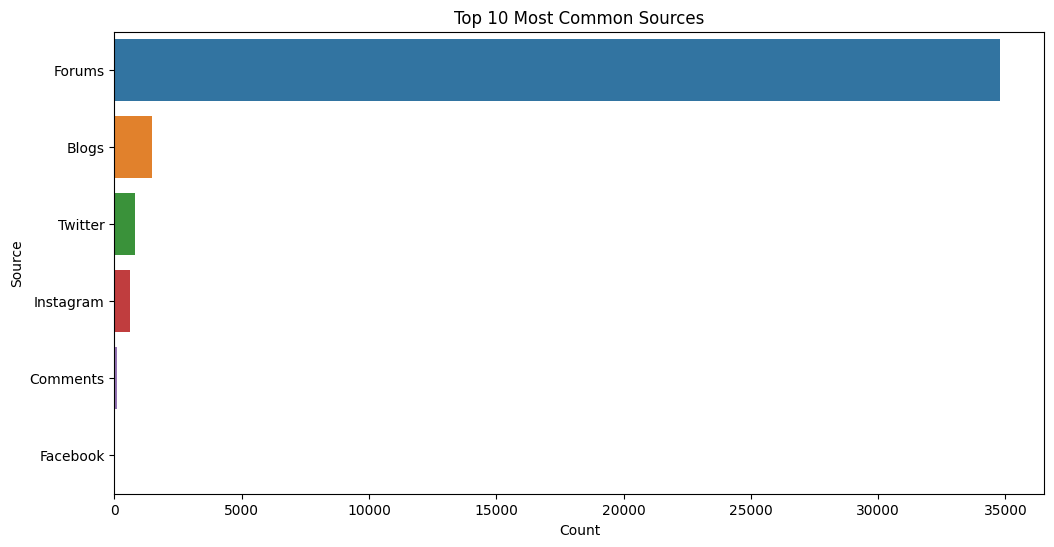

In [ ]:
# Group and aggregate data to count occurrences
source_counts = df_row_dropped['Source Type'].value_counts().nlargest(10)

# Create a single subplot for visualizations
fig, ax = plt.subplots(figsize=(12, 6))

# Plot most common sources
sns.barplot(x=source_counts.values, y=source_counts.index, ax=ax)
ax.set_title('Top 10 Most Common Sources')
ax.set_xlabel('Count')
ax.set_ylabel('Source')

# Show the plot
plt.show()

In [ ]:
# Define a function to check for "CGM" in a string
def check_company(text):
    text_lower = text.lower()  # Convert the input text to lowercase for case-insensitive matching
    # if the text contains both dexcom and libre
    if ('dexcom' or 'g6') in text_lower and ('libre' or 'freestyle') in text_lower:
        return 'Both'
    # if the text contains dexcom only
    elif 'g6' in text_lower or 'dexcom' in text_lower:
        return 'DexCom'
    # if the text contains libre only
    elif 'libre' in text_lower or 'freestyle' in text_lower:
        return 'Libre'
    # contains neither libre not dexcom
    else:
        return 'Nothing'

# Apply the check_company function to the specified column and create a new column
df_row_dropped['CGM Company'] = df_row_dropped['Sound Bite Text'].apply(check_company)

In [ ]:
# Visualise the number of dexcom, libre etc in text

# Count the number of occurrences of each unique value in the 'CGM_Company' column
value_counts = df['CGM_Company'].value_counts()

# Create a color palette for the chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart for the value counts
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)

# Adding a title and legend
plt.title('Distribution of "CGM_Company" Values')
plt.legend(value_counts.index, loc='upper right')

# Make the pie chart a perfect circle
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
nltk.download('vader_lexicon')  # Download the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon for sentiment analysis in Natural Language Toolkit (NLTK).

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# VADER for Sentiment Analysis

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment_score(stem_list):
    stemmed_text = ' '.join(stem_list)
    return analyzer.polarity_scores(stemmed_text)['compound']

# Sentiment analysis to the 'Stemmed Text' column
df_row_dropped['Sentiment Score'] = df_row_dropped['Stemmed Text'].apply(get_sentiment_score)

# Sentiment ranges and assign scores as per the assignment sheet
def assign_sentiment(score):
    if score < -0.5:
        return 1
    elif -0.5 <= score < -0.1:
        return 2
    elif -0.1 <= score < 0.1:
        return 3
    elif 0.1 <= score < 0.5:
        return 4
    else:
        return 5

df_row_dropped['Sentiment_Score_Scaled'] = df_row_dropped['Sentiment Score'].apply(assign_sentiment)

In [ ]:
df_row_dropped.columns # to check the columns of the dataframe

Index(['Post ID', 'Sound Bite Text', 'Source Type', 'Is Paid', 'Media Type',
       'URL', 'Domain', 'Sentiment', 'Published Date (GMT-04:00) New York',
       'Author Gender', 'Author Reddit Karma', 'Richness', 'Reddit Score',
       'Stemmed Text', 'Lemmatized Text', 'CGM Company', 'Sentiment Score',
       'Sentiment_Score_Scaled'],
      dtype='object')

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_row_dropped['Sound Bite Text'])

In [ ]:
# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df_row_dropped['Sentiment_Score_Scaled'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)


print(f"Accuracy Testing: {accuracy}\n")
print(f"Accuracy Training : {accuracy_train}\n")

Accuracy Testing: 0.5765622935658608

Accuracy Training : 0.6288356729975227



In [ ]:
df_row_dropped.info() # check info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Post ID                              37844 non-null  object 
 1   Sound Bite Text                      37844 non-null  object 
 2   Source Type                          37844 non-null  object 
 3   Is Paid                              37844 non-null  object 
 4   Media Type                           37844 non-null  object 
 5   URL                                  37844 non-null  object 
 6   Domain                               37844 non-null  object 
 7   Sentiment                            37844 non-null  object 
 8   Published Date (GMT-04:00) New York  37844 non-null  object 
 9   Author Gender                        37844 non-null  object 
 10  Author Reddit Karma                  37844 non-null  object 
 11  Richness                    

## Topic Modelling

In [ ]:
import gensim  # Import the Gensim library for topic modeling and document similarity analysis.
from gensim import corpora  # Import the corpora module from Gensim for text corpus management.
from nltk.corpus import stopwords  # Import the stopwords from NLTK, which are common words to be excluded in text analysis.
from gensim.models.coherencemodel import CoherenceModel  # Import the CoherenceModel class from Gensim for coherence score calculation.

# Preprocessing
tokens = df_row_dropped['Sound Bite Text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenize the text data to obtain individual words in lowercase.
stop_words = set(stopwords.words('english'))  # Define a set of English stopwords to be removed from the text.
tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words and word.isalpha()])  # Remove stopwords and non-alphabetic characters.
dictionary = corpora.Dictionary(tokens)  # Create a Gensim dictionary to map words to numerical IDs.
corpus = [dictionary.doc2bow(text) for text in tokens]  # Create a corpus of documents in the Bag of Words (BoW) format for further analysis.


In [ ]:
# LDA model with new hyperparameters
lda_tuned = gensim.models.LdaMulticore(corpus,
                                          num_topics=10,  # Adjusted number of topics
                                          id2word=dictionary,
                                          passes=15,  # Increased number of passes
                                          alpha='asymmetric',  # Changed alpha to 'asymmetric'
                                          eta=0.01,  # Kept eta as it is
                                          workers=2)

topics = []
# Display topics for the newly tuned model
topics_tuned = lda_tuned.print_topics(num_words=10)
for topic in topics_tuned:
    topics.append(topic)
    print(topic)

# Calculate coherence score for the new model
coherence_model_tuned = CoherenceModel(model=lda_tuned, texts=tokens, dictionary=dictionary, coherence='c_v')
coherence_lda_tuned = coherence_model_tuned.get_coherence()
print('\nCoherence Score for Tuned Model: ', coherence_lda_tuned)

(0, '0.022*"cgm" + 0.020*"low" + 0.018*"im" + 0.013*"like" + 0.012*"dexcom" + 0.011*"time" + 0.011*"get" + 0.010*"dont" + 0.010*"high" + 0.009*"insulin"')
(1, '0.022*"im" + 0.022*"insurance" + 0.022*"dexcom" + 0.017*"get" + 0.016*"cgm" + 0.010*"insulin" + 0.008*"would" + 0.008*"supplies" + 0.008*"one" + 0.007*"pump"')
(2, '0.054*"dexcom" + 0.036*"app" + 0.032*"phone" + 0.018*"use" + 0.015*"watch" + 0.011*"im" + 0.009*"data" + 0.009*"omnipod" + 0.008*"using" + 0.008*"apple"')
(3, '0.035*"blood" + 0.030*"sugar" + 0.017*"cgm" + 0.013*"insulin" + 0.009*"eat" + 0.008*"im" + 0.008*"eating" + 0.008*"diet" + 0.008*"carbs" + 0.007*"day"')
(4, '0.043*"dexcom" + 0.024*"ive" + 0.014*"arm" + 0.013*"sensor" + 0.013*"finger" + 0.011*"im" + 0.011*"accurate" + 0.009*"never" + 0.009*"put" + 0.009*"readings"')
(5, '0.029*"libre" + 0.026*"cgm" + 0.020*"freestyle" + 0.016*"get" + 0.013*"diabetes" + 0.012*"really" + 0.011*"like" + 0.010*"know" + 0.010*"much" + 0.010*"would"')
(6, '0.056*"pump" + 0.026*"cgm"

In [ ]:
# function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, alpha='symmetric', eta=0.01, passes=15, workers=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    alpha : Document-Topic Density
    eta : Topic-Word Density
    passes : Number of passes
    workers : Number of workers

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []  # Initialize a list to store coherence values.
    model_list = []  # Initialize a list to store LDA topic models.
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary,
                                           passes=passes, alpha=alpha, eta=eta, workers=workers)  # Create an LDA model with specified parameters.
        model_list.append(model)  # Append the LDA model to the list.
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')  # Calculate coherence score.
        coherence_values.append(coherencemodel.get_coherence())  # Append the coherence score to the list.

    return model_list, coherence_values

# Assuming your data (corpus, dictionary, texts) is loaded and ready
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokens, start=2, limit=40, step=4, alpha='asymmetric', passes=15, workers=4)


In [ ]:
# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

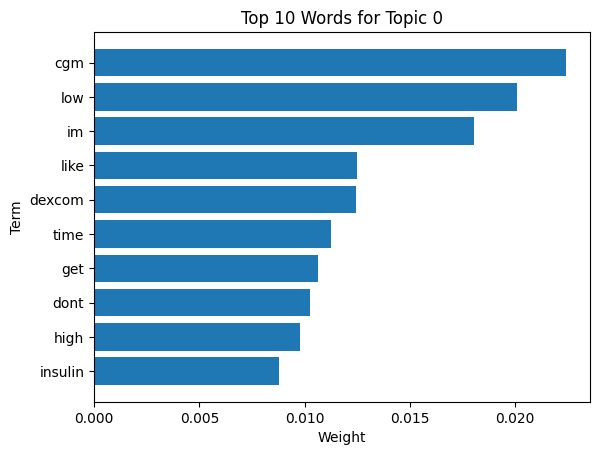

In [ ]:
# function to plot words for a topic
def plot_topic_words(lda_model, topic_id, top_n=10):
    terms = [term for term, _ in lda_tuned.show_topic(topic_id, topn=top_n)]
    weights = [weight for _, weight in lda_model.show_topic(topic_id, topn=top_n)]

    plt.barh(terms, weights)
    plt.xlabel('Weight')
    plt.ylabel('Term')
    plt.title(f"Top {top_n} Words for Topic {topic_id}")
    plt.gca().invert_yaxis()
    plt.show()

# Example: Visualize words for topic 0
plot_topic_words(lda_tuned, 0)

In [ ]:
# function to extract dominant features
def get_dominant_topic(ldamodel, corpus, texts):
    # Initialize dataframe
    df_topic_sents_keywords = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        # If lda model does not return any topics for the document
        if not row_list:
            new_row = pd.DataFrame([[None, None, None]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
        else:
            row = row_list[0] if ldamodel.per_word_topics else row_list
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            topic_num, prop_topic = row[0]
            wp = ldamodel.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            new_row = pd.DataFrame([[int(topic_num), round(prop_topic,4), topic_keywords]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
        df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, new_row], ignore_index=True)

    # Add original text to the end of the output
    contents = pd.Series(texts)
    df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, contents], axis=1)
    return df_topic_sents_keywords

df_topic_keywords = get_dominant_topic(ldamodel=lda_tuned, corpus=corpus, texts=df_row_dropped['Sound Bite Text'])


In [ ]:
df_topic_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Sound Bite Text
0,1,0.7244,"im, insurance, dexcom, get, cgm, insulin, woul...",numbers great estimated a1c 7ish doesnt care s...
1,3,0.4275,"blood, sugar, cgm, insulin, eat, im, eating, d...",tried little side effects help insulin resista...
2,6,0.6177,"pump, cgm, dexcom, insulin, years, medtronic, ...",ran characters youtuberwgl2pdhqim ill also say...
3,3,0.4141,"blood, sugar, cgm, insulin, eat, im, eating, d...",lunch ate 1030am 1 unit novolog insulin via pu...
4,0,0.3244,"cgm, low, im, like, dexcom, time, get, dont, h...",also like soak hot tub potential exists lowere...
...,...,...,...,...
37839,6,0.4666,"pump, cgm, dexcom, insulin, years, medtronic, ...",push game changer opinion course comes issues ...
37840,1,0.2683,"im, insurance, dexcom, get, cgm, insulin, woul...",mom learned inject 10 year old self oranges pe...
37841,2,0.4126,"dexcom, app, phone, use, watch, im, data, omni...",spoke rep abbott rep told yet plans update fre...
37842,7,0.3715,"glucose, continuous, monitor, blood, levels, s...",25 weeks since started im feeling better liter...


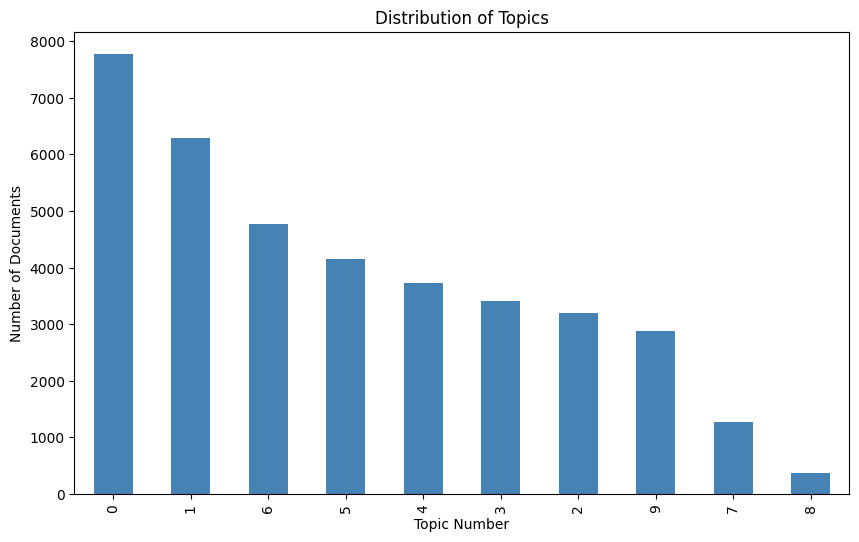

In [ ]:
# show graph
topic_counts = df_topic_keywords['Dominant_Topic'].value_counts()
topic_counts.plot(kind='bar', color='steelblue', figsize=(10,6))
plt.title("Distribution of Topics")
plt.ylabel("Number of Documents")
plt.xlabel("Topic Number")
plt.show()

In [ ]:
# For example, to see posts associated with topic 0:
topic_0_posts = df_topic_keywords[df_topic_keywords['Dominant_Topic'] == 0]
print(topic_0_posts.sample(5))

       Dominant_Topic  Perc_Contribution  \
26530               0             0.6833   
36117               0             0.3465   
1382                0             0.7137   
30626               0             0.4470   
17657               0             0.9601   

                                          Topic_Keywords  \
26530  cgm, low, im, like, dexcom, time, get, dont, h...   
36117  cgm, low, im, like, dexcom, time, get, dont, h...   
1382   cgm, low, im, like, dexcom, time, get, dont, h...   
30626  cgm, low, im, like, dexcom, time, get, dont, h...   
17657  cgm, low, im, like, dexcom, time, get, dont, h...   

                                         Sound Bite Text  
26530  okay type 1 taking insulin days probably kill ...  
36117  know best outcomes diabetes correlate tight gl...  
1382   1 im sorry waited long thats rough 2 sensors c...  
30626  interesting different different people hit 41 ...  
17657  happens cgm cgm basis always want post questio...  


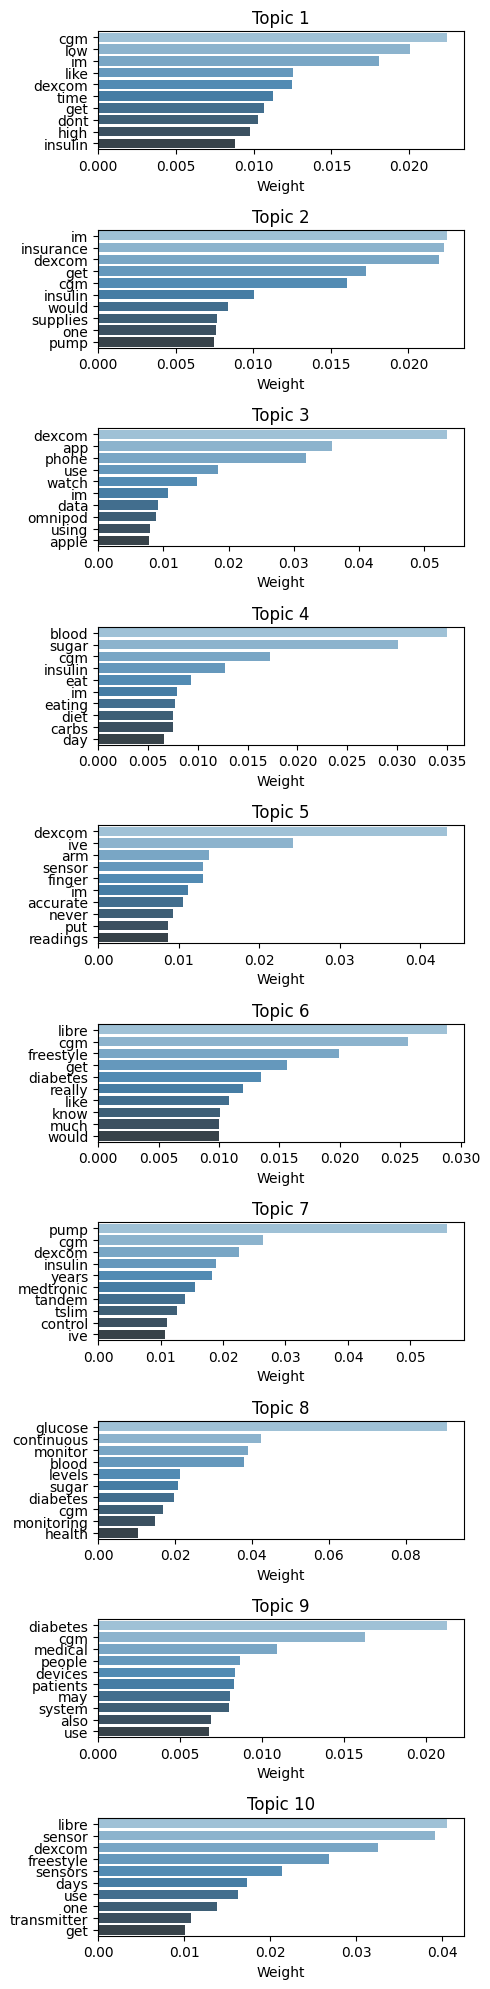

In [ ]:
def visualize_lda_topics(lda_model, num_topics, num_words=10):
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=num_topics, figsize=(5, 2*num_topics), dpi=100)

    # For each topic, visualize the top words
    for topic in range(num_topics):
        top_words = dict(lda_model.show_topic(topic, num_words))
        sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), ax=axes[topic], palette="Blues_d")
        axes[topic].set_title(f"Topic {topic + 1}")
        axes[topic].set_xlabel("Weight")

    plt.tight_layout()
    plt.show()

# Call the function with your lda_model
visualize_lda_topics(lda_tuned, 10)

In [ ]:

topic_labels = [
    "Device & Usage",
    "Placement & Discomfort",
    "Insurance & Costs",
    "Device Brands & Choices",
    "General Queries & Doubts",
    "Health & Diabetes Management",
    "Sugar Levels Monitoring",
    "Insulin Types",
    "Glucose Monitoring",
    "Personal Experiences & Preferences",
    "Tech & Approvals",
    "Personal Journey"
]

# Map Topics to Labels
for idx, (topic_num, topic_content) in enumerate(topics):
    print(f"Topic {topic_num + 1}: {topic_labels[idx]}")
    print(topic_content)
    print("-------\n")


Topic 1: Device & Usage
0.022*"cgm" + 0.020*"low" + 0.018*"im" + 0.013*"like" + 0.012*"dexcom" + 0.011*"time" + 0.011*"get" + 0.010*"dont" + 0.010*"high" + 0.009*"insulin"
-------

Topic 2: Placement & Discomfort
0.022*"im" + 0.022*"insurance" + 0.022*"dexcom" + 0.017*"get" + 0.016*"cgm" + 0.010*"insulin" + 0.008*"would" + 0.008*"supplies" + 0.008*"one" + 0.007*"pump"
-------

Topic 3: Insurance & Costs
0.054*"dexcom" + 0.036*"app" + 0.032*"phone" + 0.018*"use" + 0.015*"watch" + 0.011*"im" + 0.009*"data" + 0.009*"omnipod" + 0.008*"using" + 0.008*"apple"
-------

Topic 4: Device Brands & Choices
0.035*"blood" + 0.030*"sugar" + 0.017*"cgm" + 0.013*"insulin" + 0.009*"eat" + 0.008*"im" + 0.008*"eating" + 0.008*"diet" + 0.008*"carbs" + 0.007*"day"
-------

Topic 5: General Queries & Doubts
0.043*"dexcom" + 0.024*"ive" + 0.014*"arm" + 0.013*"sensor" + 0.013*"finger" + 0.011*"im" + 0.011*"accurate" + 0.009*"never" + 0.009*"put" + 0.009*"readings"
-------

Topic 6: Health & Diabetes Management

In [ ]:
df_topic_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dominant_Topic     37844 non-null  int64  
 1   Perc_Contribution  37844 non-null  float32
 2   Topic_Keywords     37844 non-null  object 
 3   Sound Bite Text    37844 non-null  object 
dtypes: float32(1), int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
df_row_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Post ID                              37844 non-null  object 
 1   Sound Bite Text                      37844 non-null  object 
 2   Source Type                          37844 non-null  object 
 3   Is Paid                              37844 non-null  object 
 4   Media Type                           37844 non-null  object 
 5   URL                                  37844 non-null  object 
 6   Domain                               37844 non-null  object 
 7   Sentiment                            37844 non-null  object 
 8   Published Date (GMT-04:00) New York  37844 non-null  object 
 9   Author Gender                        37844 non-null  object 
 10  Author Reddit Karma                  37844 non-null  object 
 11  Richness                    

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

#Tokenize and apply POS tagging
def pos_tagging(text):
    return nltk.pos_tag(word_tokenize(text))

#Apply POS tagging to the 'Sound Bite Text' column
df_row_dropped['POS_Tags'] = df_row_dropped['Sound Bite Text'].apply(pos_tagging)

#Display a sample of the dataset with POS tags
df_row_dropped[['Sound Bite Text', 'POS_Tags']].sample(5)

,Sound Bite Text,POS_Tags
31878,libre first generation receiver scan arm prett...,"[(libre, NN), (first, JJ), (generation, NN), (..."
13608,also logically surmized damage brain longer an...,"[(also, RB), (logically, RB), (surmized, JJ), ..."
37636,changed entered new sensor codetransmitter pho...,"[(changed, VBN), (entered, VBD), (new, JJ), (s..."
19912,hi recently moved maryland looking establish c...,"[(hi, NN), (recently, RB), (moved, VBD), (mary..."
28510,insulin resistant thanks otc insulin hes bette...,"[(insulin, NN), (resistant, JJ), (thanks, NNS)..."


In [ ]:
df_row_dropped['CGM Company'].value_counts()

DexCom     16609
Nothing    14746
Libre       4159
Both        2330
Name: CGM Company, dtype: int64

In [ ]:
df_dexcom = df_row_dropped[df_row_dropped['CGM Company'] == 'DexCom']
df_libre = df_row_dropped[df_row_dropped['CGM Company'] == 'Libre']
df_nothing = df_row_dropped[df_row_dropped['CGM Company'] == 'Nothing']
df_both = df_row_dropped[df_row_dropped['CGM Company'] == 'Both']

In [ ]:
df_dexcom = df_dexcom.reset_index(drop=True)
df_libre = df_libre.reset_index(drop=True)
df_nothing = df_nothing.reset_index(drop=True)
df_both = df_both.reset_index(drop=True)

### Performing topic modelling on the data the mentions DexCom

In [ ]:
# Preprocessing
tokens = df_dexcom['Sound Bite Text'].apply(lambda x: word_tokenize(x.lower()))
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words and word.isalpha()])
dictionary = corpora.Dictionary(tokens)
corpus_dexcom = [dictionary.doc2bow(text) for text in tokens]

In [ ]:
# LDA model with new hyperparameters
lda_tuned_dexcom = gensim.models.LdaMulticore(corpus_dexcom,
                                          num_topics=5,  # Adjusted number of topics
                                          id2word=dictionary,
                                          passes=15,  # Increased number of passes
                                          alpha='asymmetric',  # Changed alpha to 'asymmetric'
                                          eta=0.01,  # Kept eta as it is
                                          workers=4)

topics = []
# Display topics for the newly tuned model
topics_tuned = lda_tuned_dexcom.print_topics(num_words=10)
for topic in topics_tuned:
    topics.append(topic)
    print(topic)

# Calculate coherence score for the new model
coherence_model_tuned = CoherenceModel(model=lda_tuned_dexcom, texts=tokens, dictionary=dictionary, coherence='u_mass')
coherence_lda_tuned = coherence_model_tuned.get_coherence()
print('\nCoherence Score for Tuned Model: ', coherence_lda_tuned)

(0, '0.037*"dexcom" + 0.012*"im" + 0.010*"pump" + 0.009*"like" + 0.009*"cgm" + 0.007*"time" + 0.007*"get" + 0.007*"low" + 0.007*"blood" + 0.007*"sensor"')
(1, '0.039*"dexcom" + 0.020*"im" + 0.014*"ive" + 0.011*"get" + 0.010*"got" + 0.009*"insulin" + 0.008*"days" + 0.008*"last" + 0.008*"pump" + 0.008*"years"')
(2, '0.049*"dexcom" + 0.015*"app" + 0.011*"phone" + 0.011*"get" + 0.010*"insurance" + 0.010*"use" + 0.009*"im" + 0.008*"watch" + 0.008*"dont" + 0.007*"would"')
(3, '0.024*"dexcom" + 0.012*"blood" + 0.011*"use" + 0.011*"ive" + 0.009*"sugar" + 0.009*"cgm" + 0.009*"glucose" + 0.008*"time" + 0.007*"like" + 0.007*"im"')
(4, '0.025*"pump" + 0.024*"dexcom" + 0.013*"cgm" + 0.013*"im" + 0.012*"omnipod" + 0.011*"tandem" + 0.010*"tslim" + 0.010*"insulin" + 0.009*"loop" + 0.009*"glucose"')

Coherence Score for Tuned Model:  -1.922181676982144


# Change this later

LDA Topics:

Certainly! Based on the provided topics and their associated keywords, here's an interpretation along with potential topic headings for each:

1. **Topic 0**:
   - Keywords: dexcom, sensor, ive, pump, get, im, like, use, one, dont
   - Interpretation: This topic seems to center around users' experiences with the Dexcom system, particularly in relation to its sensor and potential integration with insulin pumps. The presence of words like "ive", "get", and "use" suggests personal experiences and practical aspects of using Dexcom.
   - **Heading**: "User Experiences with Dexcom and Its Sensor"

2. **Topic 1**:
   - Keywords: dexcom, im, insurance, get, cgm, pump, would, using, like, endo
   - Interpretation: The focus here is on the practicalities and challenges of obtaining and using Dexcom, with a particular emphasis on insurance concerns. The mention of "endo" might refer to endocrinologists, suggesting discussions about medical consultations or recommendations.
   - **Heading**: "Insurance and Medical Aspects of Using Dexcom"

3. **Topic 2**:
   - Keywords: dexcom, app, phone, use, im, watch, also, dont, pump, like
   - Interpretation: This topic emphasizes the technological interfaces associated with Dexcom, such as its mobile app, phone integration, and possibly smartwatches. It might also touch upon comparisons or integrations with pumps.
   - **Heading**: "Tech Integration: Dexcom's App, Phone, and Watch"

4. **Topic 3**:
   - Keywords: dexcom, im, pump, insulin, low, ive, cgm, like, sugar, get
   - Interpretation: Discussions seem to revolve around managing blood sugar levels using Dexcom and its relation to insulin pumps. Words like "low", "sugar", and "insulin" point towards active blood sugar management and challenges faced.
   - **Heading**: "Blood Sugar Management with Dexcom and Insulin Pumps"

5. **Topic 4**:
   - Keywords: cgm, dexcom, glucose, diabetes, blood, insulin, time, would, sugar, im
   - Interpretation: This topic appears to be broader, focusing on the general theme of diabetes management and continuous glucose monitoring (CGM). It encompasses discussions about glucose levels, diabetes as a condition, and the overarching experience of managing blood sugar.
   - **Heading**: "General Diabetes Management and Continuous Glucose Monitoring"


In [ ]:
def get_dominant_topic(ldamodel, corpus, texts):
    # Initialize dataframe
    df_topic_sents_keywords = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        # If lda model does not return any topics for the document
        if not row_list:
            new_row = pd.DataFrame([[None, None, None]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
        else:
            row = row_list[0] if ldamodel.per_word_topics else row_list
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            topic_num, prop_topic = row[0]
            wp = ldamodel.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            new_row = pd.DataFrame([[int(topic_num), round(prop_topic,4), topic_keywords]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
        df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, new_row], ignore_index=True)

    # Add original text to the end of the output
    contents = pd.Series(texts)
    df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, contents], axis=1)
    return df_topic_sents_keywords


# Call the function
df_topic_keywords_dexcom = get_dominant_topic(ldamodel=lda_tuned_dexcom, corpus=corpus_dexcom, texts=df_dexcom['Sound Bite Text'])

In [ ]:
df_topic_keywords_dexcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dominant_Topic     16609 non-null  int64  
 1   Perc_Contribution  16609 non-null  float32
 2   Topic_Keywords     16609 non-null  object 
 3   Sound Bite Text    16609 non-null  object 
dtypes: float32(1), int64(1), object(2)
memory usage: 454.3+ KB


In [ ]:
df_topic_keywords_dexcom["Dominant_Topic"].value_counts()

0    8267
2    4424
1    2313
4    1056
3     549
Name: Dominant_Topic, dtype: int64

In [ ]:
df_dexcom_topic0 = df_topic_keywords_dexcom[df_topic_keywords_dexcom['Dominant_Topic'] == 0].copy()

In [ ]:
# Apply the preprocessing function to the 'Sound Bite Text' column of the topic0 of the df_dexcom_topic0 dataframe
df_dexcom_topic0['Stemmed Text'], df_dexcom_topic0['Lemmatized Text'] = zip(*df_dexcom_topic0['Sound Bite Text'].apply(preprocess_text))

In [ ]:
# Sentiment analysis to the 'Stemmed Text' column
df_dexcom_topic0['Sentiment Score'] = df_dexcom_topic0['Stemmed Text'].apply(get_sentiment_score)
df_dexcom_topic0['Sentiment_Score_Scaled'] = df_dexcom_topic0['Sentiment Score'].apply(assign_sentiment)

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_dexcom_topic0['Sound Bite Text'])

In [ ]:
# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df_dexcom_topic0['Sentiment_Score_Scaled'], test_size=0.2, random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)


print(f"Accuracy Testing: {accuracy}\n")
print(f"Accuracy Training : {accuracy_train}\n")

Accuracy Testing: 0.501813784764208

Accuracy Training : 0.67397550279752



In [ ]:
df_dexcom_topic0['Sentiment_Score_Scaled'].value_counts()

5    2962
4    1688
3    1233
2    1221
1    1163
Name: Sentiment_Score_Scaled, dtype: int64

In [ ]:
def plot_sentiment_counts(series):
    # Extract labels and values
    labels = series.index.tolist()
    values = series.values.tolist()

    # Calculate total counts
    total = sum(values)

    # Convert values to percentages
    percentages = [(value / total) * 100 for value in values]

    # Generate colors
    cmap = plt.get_cmap("tab10")
    colors = cmap(np.linspace(0, 1, len(labels)))

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(labels, percentages, color=colors)

    # Add data labels
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

    ax.set_xlabel('Sentiment Score Scaled')
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Distribution of Sentiment Scores as Percentage')
    ax.set_ylim(0, max(percentages) + 5)

    plt.show()

# Here's how you would call the function with your data:
# plot_sentiment_counts(df_dexcom_topic1['Sentiment_Score_Scaled'].value_counts())


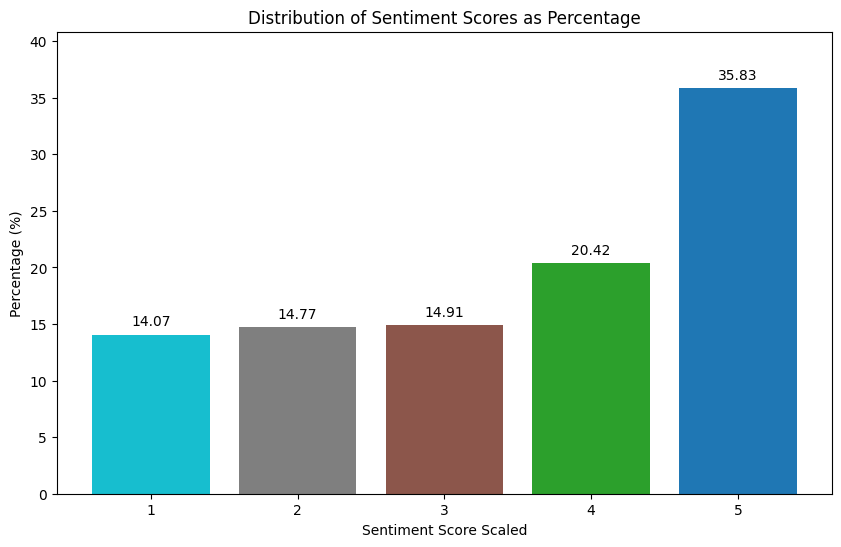

In [ ]:
plot_sentiment_counts(df_dexcom_topic0['Sentiment_Score_Scaled'].value_counts())

Since most of the sentiments in

In [ ]:
df_dexcom_topic1 = df_topic_keywords_dexcom[df_topic_keywords_dexcom['Dominant_Topic'] == 1].copy()

In [ ]:
# Apply the preprocessing function to the 'Sound Bite Text' column of the topic1 of the df_dexcom_topic1 dataframe
df_dexcom_topic1['Stemmed Text'], df_dexcom_topic1['Lemmatized Text'] = zip(*df_dexcom_topic1['Sound Bite Text'].apply(preprocess_text))

In [ ]:
# Sentiment analysis to the 'Stemmed Text' column
df_dexcom_topic1['Sentiment Score'] = df_dexcom_topic1['Stemmed Text'].apply(get_sentiment_score)
df_dexcom_topic1['Sentiment_Score_Scaled'] = df_dexcom_topic1['Sentiment Score'].apply(assign_sentiment)

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_dexcom_topic1['Sound Bite Text'])

In [ ]:
# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df_dexcom_topic1['Sentiment_Score_Scaled'], test_size=0.2, random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)


print(f"Accuracy Testing: {accuracy}\n")
print(f"Accuracy Training : {accuracy_train}\n")

Accuracy Testing: 0.47300215982721383

Accuracy Training : 0.7881081081081082



In [ ]:
df_dexcom_topic1['Sentiment_Score_Scaled'].value_counts()

5    625
4    546
3    483
2    355
1    304
Name: Sentiment_Score_Scaled, dtype: int64

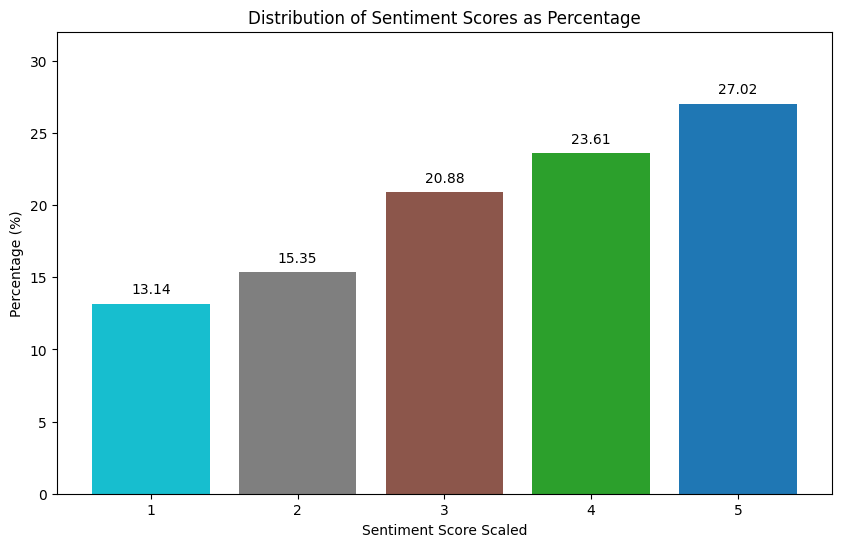

In [ ]:
plot_sentiment_counts(df_dexcom_topic1['Sentiment_Score_Scaled'].value_counts())

In [ ]:
df_dexcom_topic2 = df_topic_keywords_dexcom[df_topic_keywords_dexcom['Dominant_Topic'] == 2].copy()

In [ ]:
# Apply the preprocessing function to the 'Sound Bite Text' column of the topic2 of the df_dexcom_topic2 dataframe
df_dexcom_topic2['Stemmed Text'], df_dexcom_topic2['Lemmatized Text'] = zip(*df_dexcom_topic2['Sound Bite Text'].apply(preprocess_text))

In [ ]:
# Sentiment analysis to the 'Stemmed Text' column
df_dexcom_topic2['Sentiment Score'] = df_dexcom_topic2['Stemmed Text'].apply(get_sentiment_score)
df_dexcom_topic2['Sentiment_Score_Scaled'] = df_dexcom_topic2['Sentiment Score'].apply(assign_sentiment)

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_dexcom_topic2['Sound Bite Text'])

In [ ]:
# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df_dexcom_topic2['Sentiment_Score_Scaled'], test_size=0.2, random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)


print(f"Accuracy Testing: {accuracy}\n")
print(f"Accuracy Training : {accuracy_train}\n")

Accuracy Testing: 0.4903954802259887

Accuracy Training : 0.7066968070076293



In [ ]:
df_dexcom_topic2['Sentiment_Score_Scaled'].value_counts()

5    1427
4    1048
3    1033
2     588
1     328
Name: Sentiment_Score_Scaled, dtype: int64

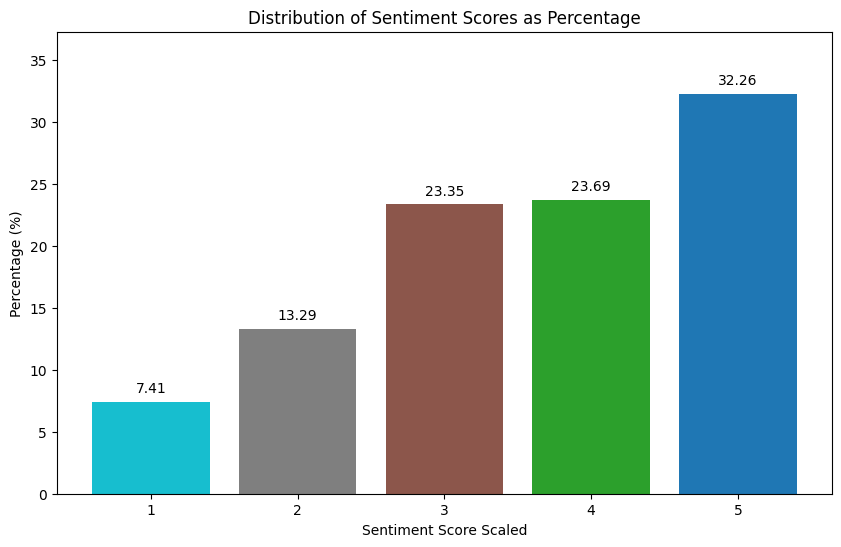

In [ ]:
plot_sentiment_counts(df_dexcom_topic2['Sentiment_Score_Scaled'].value_counts())

### Performing topic modelling on the data the mentions Libre

In [ ]:
# Preprocessing
tokens = df_libre['Sound Bite Text'].apply(lambda x: word_tokenize(x.lower()))
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words and word.isalpha()])
dictionary = corpora.Dictionary(tokens)
corpus_libre = [dictionary.doc2bow(text) for text in tokens]

In [ ]:
# LDA model with new hyperparameters
lda_tuned_libre = gensim.models.LdaMulticore(corpus_libre,
                                          num_topics=5,  # Adjusted number of topics
                                          id2word=dictionary,
                                          passes=15,  # Increased number of passes
                                          alpha='asymmetric',  # Changed alpha to 'asymmetric'
                                          eta=0.01,  # Kept eta as it is
                                          workers=4)

topics = []
# Display topics for the newly tuned model
topics_tuned = lda_tuned_libre.print_topics(num_words=10)
for topic in topics_tuned:
    topics.append(topic)
    print(topic)

# Calculate coherence score for the new model
coherence_model_tuned = CoherenceModel(model=lda_tuned_libre, texts=tokens, dictionary=dictionary, coherence='u_mass')
coherence_lda_tuned = coherence_model_tuned.get_coherence()
print('\nCoherence Score for Tuned Model: ', coherence_lda_tuned)

(0, '0.035*"libre" + 0.027*"freestyle" + 0.018*"im" + 0.016*"cgm" + 0.010*"get" + 0.009*"glucose" + 0.007*"use" + 0.007*"blood" + 0.007*"day" + 0.007*"using"')
(1, '0.022*"blood" + 0.019*"sugar" + 0.017*"glucose" + 0.014*"cgm" + 0.008*"diabetes" + 0.007*"continuous" + 0.007*"libre" + 0.007*"freestyle" + 0.006*"levels" + 0.006*"eat"')
(2, '0.032*"back" + 0.022*"libre" + 0.020*"freestyle" + 0.016*"brace" + 0.015*"knee" + 0.011*"support" + 0.009*"also" + 0.009*"one" + 0.009*"medical" + 0.008*"free"')
(3, '0.036*"libre" + 0.029*"freestyle" + 0.011*"use" + 0.010*"cgm" + 0.010*"sensor" + 0.009*"ive" + 0.008*"like" + 0.008*"get" + 0.008*"sensors" + 0.008*"blood"')
(4, '0.027*"libre" + 0.026*"glucose" + 0.026*"freestyle" + 0.014*"diabetes" + 0.013*"sensor" + 0.011*"app" + 0.010*"blood" + 0.009*"levels" + 0.009*"continuous" + 0.008*"cgm"')

Coherence Score for Tuned Model:  -1.728025306582536


LDA topics:

1. **Topic 0**:
   - Keywords: libre, freestyle, use, cgm, get, sensor, im, dont, phone, like
   - Interpretation: This topic focuses on users' experiences and practicalities of using the Freestyle Libre, especially its sensor. Discussions may include how users feel about it ("like", "dont") and possibly its integration with phones.
   - **Heading**: "Practical Use and User Feelings about Freestyle Libre"

2. **Topic 1**:
   - Keywords: libre, freestyle, glucose, diabetes, blood, sensor, using, levels, use, one
   - Interpretation: The emphasis here is on the broader theme of diabetes management using the Freestyle Libre. The presence of words like "glucose", "blood", and "levels" suggests discussions about blood glucose measurements and monitoring.
   - **Heading**: "Diabetes Monitoring with Freestyle Libre"

3. **Topic 2**:
   - Keywords: libre, freestyle, glucose, cgm, sensor, im, app, one, using, use
   - Interpretation: This topic seems to revolve around the technological aspects of the Freestyle Libre system. The mention of "app" suggests discussions about the mobile application and how users interact with it.
   - **Heading**: "Tech Integration of Freestyle Libre with CGM Apps"

4. **Topic 3**:
   - Keywords: libre, freestyle, blood, cgm, sugar, glucose, im, day, insulin, like
   - Interpretation: This topic appears to center around daily diabetes management using the Freestyle Libre. Words like "day", "sugar", and "insulin" hint at discussions about day-to-day blood sugar management challenges.
   - **Heading**: "Day-to-Day Diabetes Management with Freestyle Libre"

5. **Topic 4**:
   - Keywords: back, knee, brace, support, freestyle, libre, also, medical, glucose, blood
   - Interpretation: This topic seems a bit more varied. While it includes mentions of the Freestyle Libre and glucose monitoring, it also brings in aspects of medical support equipment like braces for the back and knee. This might indicate a mix of discussions or a segment of users who discuss both diabetes and other medical support topics.
   - **Heading**: "Freestyle Libre in the Context of Broader Medical Support"


In [ ]:
# Call the function
df_topic_keywords_libre = get_dominant_topic(ldamodel=lda_tuned_libre, corpus=corpus_libre, texts=df_libre['Sound Bite Text'])

In [ ]:
df_topic_keywords_libre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dominant_Topic     4159 non-null   int64  
 1   Perc_Contribution  4159 non-null   float32
 2   Topic_Keywords     4159 non-null   object 
 3   Sound Bite Text    4159 non-null   object 
dtypes: float32(1), int64(1), object(2)
memory usage: 113.8+ KB


In [ ]:
df_topic_keywords_libre["Dominant_Topic"].value_counts()

0    2139
3    1239
4     498
2     142
1     141
Name: Dominant_Topic, dtype: int64

In [ ]:
df_libre_topic0 = df_topic_keywords_libre[df_topic_keywords_libre['Dominant_Topic'] == 0].copy()

In [ ]:
# Apply the preprocessing function to the 'Sound Bite Text' column of the topic0 of the df_libre_topic0 dataframe
df_libre_topic0['Stemmed Text'], df_libre_topic0['Lemmatized Text'] = zip(*df_libre_topic0['Sound Bite Text'].apply(preprocess_text))

In [ ]:
# Sentiment analysis to the 'Stemmed Text' column
df_libre_topic0['Sentiment Score'] = df_libre_topic0['Stemmed Text'].apply(get_sentiment_score)
df_libre_topic0['Sentiment_Score_Scaled'] = df_libre_topic0['Sentiment Score'].apply(assign_sentiment)

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_libre_topic0['Sound Bite Text'])

In [ ]:
# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df_libre_topic0['Sentiment_Score_Scaled'], test_size=0.2, random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)


print(f"Accuracy Testing: {accuracy}\n")
print(f"Accuracy Training : {accuracy_train}\n")

Accuracy Testing: 0.42990654205607476

Accuracy Training : 0.7738164815897136



In [ ]:
df_libre_topic0['Sentiment_Score_Scaled'].value_counts()

5    699
4    465
3    373
2    344
1    258
Name: Sentiment_Score_Scaled, dtype: int64

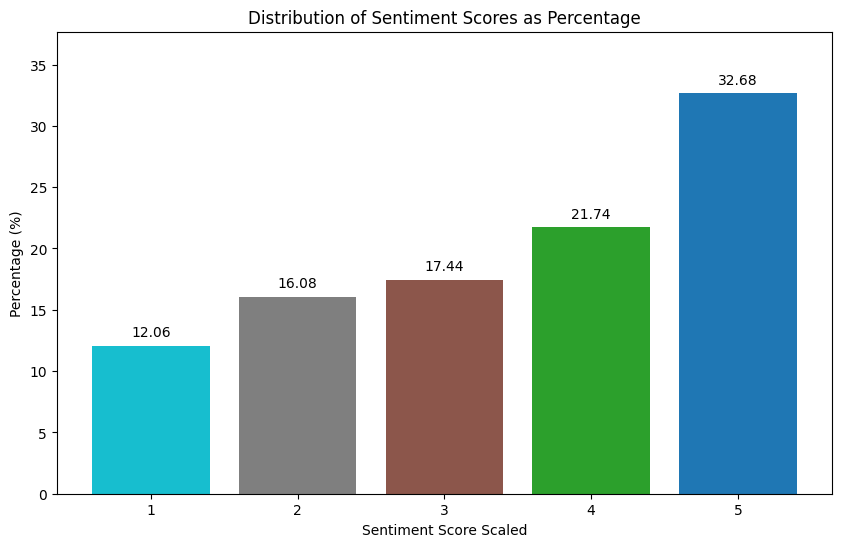

In [ ]:
plot_sentiment_counts(df_libre_topic0['Sentiment_Score_Scaled'].value_counts())

Since most of the sentiments in

In [ ]:
df_libre_topic1 = df_topic_keywords_libre[df_topic_keywords_libre['Dominant_Topic'] == 1].copy()

In [ ]:
# Apply the preprocessing function to the 'Sound Bite Text' column of the topic1 of the df_libre_topic1 dataframe
df_libre_topic1['Stemmed Text'], df_libre_topic1['Lemmatized Text'] = zip(*df_libre_topic1['Sound Bite Text'].apply(preprocess_text))

In [ ]:
# Sentiment analysis to the 'Stemmed Text' column
df_libre_topic1['Sentiment Score'] = df_libre_topic1['Stemmed Text'].apply(get_sentiment_score)
df_libre_topic1['Sentiment_Score_Scaled'] = df_libre_topic1['Sentiment Score'].apply(assign_sentiment)

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_libre_topic1['Sound Bite Text'])

In [ ]:
# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df_libre_topic1['Sentiment_Score_Scaled'], test_size=0.2, random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)


print(f"Accuracy Testing: {accuracy}\n")
print(f"Accuracy Training : {accuracy_train}\n")

Accuracy Testing: 0.5862068965517241

Accuracy Training : 0.7857142857142857



In [ ]:
df_libre_topic1['Sentiment_Score_Scaled'].value_counts()

5    63
4    27
3    22
2    18
1    11
Name: Sentiment_Score_Scaled, dtype: int64

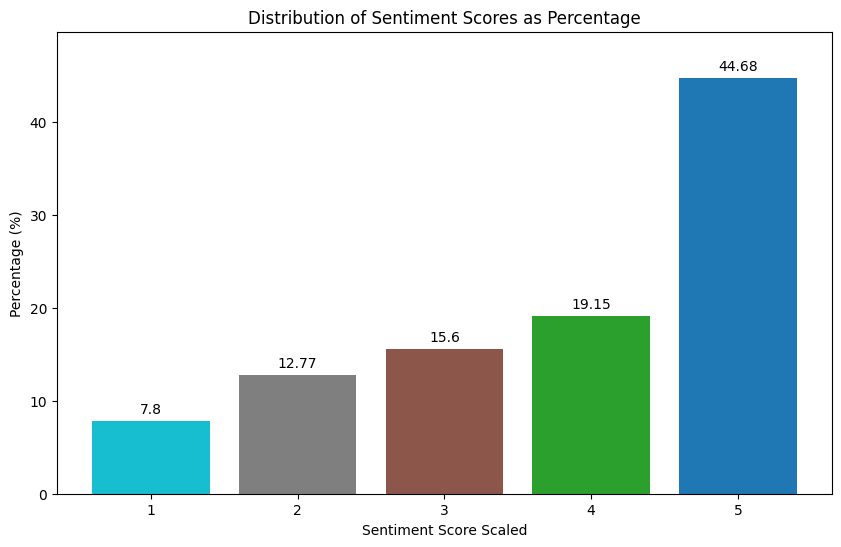

In [ ]:
plot_sentiment_counts(df_libre_topic1['Sentiment_Score_Scaled'].value_counts())

In [ ]:
df_libre_topic2 = df_topic_keywords_libre[df_topic_keywords_libre['Dominant_Topic'] == 2].copy()

In [ ]:
# Apply the preprocessing function to the 'Sound Bite Text' column of the topic2 of the df_libre_topic2 dataframe
df_libre_topic2['Stemmed Text'], df_libre_topic2['Lemmatized Text'] = zip(*df_libre_topic2['Sound Bite Text'].apply(preprocess_text))

In [ ]:
# Sentiment analysis to the 'Stemmed Text' column
df_libre_topic2['Sentiment Score'] = df_libre_topic2['Stemmed Text'].apply(get_sentiment_score)
df_libre_topic2['Sentiment_Score_Scaled'] = df_libre_topic2['Sentiment Score'].apply(assign_sentiment)

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_libre_topic2['Sound Bite Text'])

In [ ]:
# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df_libre_topic2['Sentiment_Score_Scaled'], test_size=0.2, random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)


print(f"Accuracy Testing: {accuracy}\n")
print(f"Accuracy Training : {accuracy_train}\n")

Accuracy Testing: 0.5517241379310345

Accuracy Training : 0.7522123893805309



In [ ]:
df_libre_topic2['Sentiment_Score_Scaled'].value_counts()

5    86
4    22
3    20
1     8
2     6
Name: Sentiment_Score_Scaled, dtype: int64

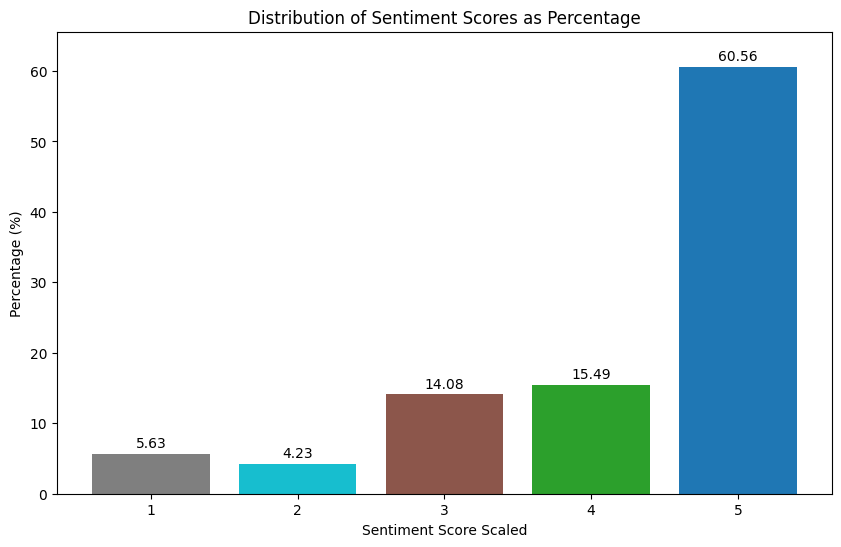

In [ ]:
plot_sentiment_counts(df_libre_topic2['Sentiment_Score_Scaled'].value_counts())

In [ ]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Perform stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # Perform lemmatization (using WordNet Lemmatizer)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the processed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)
    lemmatized_text = ' '.join(lemmatized_words)

    return stemmed_words, lemmatized_words

# Apply the preprocessing function to the 'Sound Bite Text' column
df_topic_keywords_dexcom['Stemmed Text'], df_topic_keywords_dexcom['Lemmatized Text'] = zip(*df_topic_keywords_dexcom['Sound Bite Text'].apply(preprocess_text))

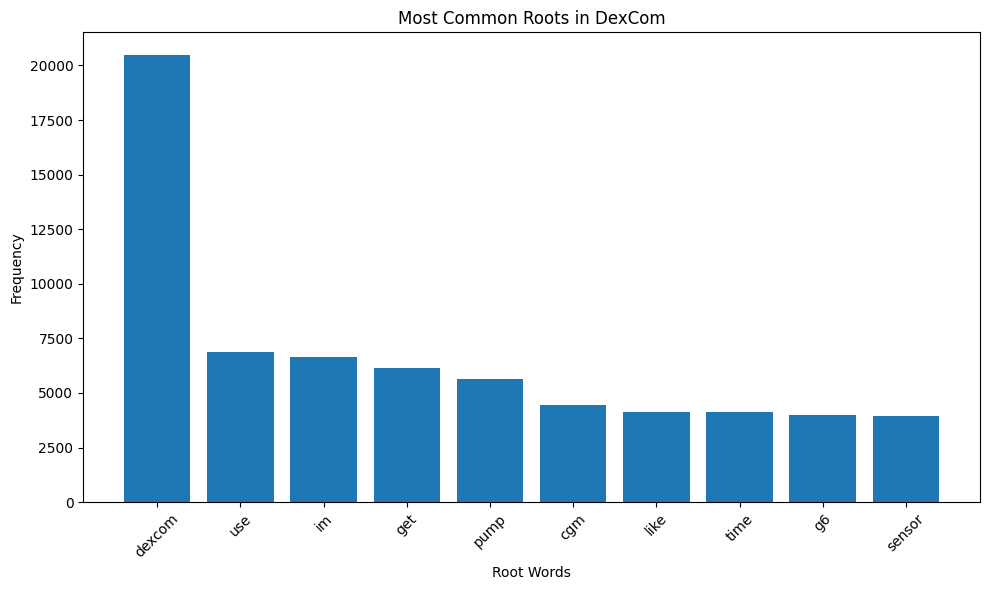

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

cleaned_words_stemmed = [stem for stems_list in df_topic_keywords_dexcom['Stemmed Text'] for stem in stems_list]

# Use Counter to count the frequency of each root
word_freq = Counter(cleaned_words_stemmed)

# Get the most common roots
most_common_roots = word_freq.most_common(10)

# Extract the roots and their frequencies for plotting
roots, frequencies = zip(*most_common_roots)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(roots, frequencies)
plt.xlabel('Root Words')
plt.ylabel('Frequency')
plt.title('Most Common Roots in DexCom')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# VADER for Sentiment Analysis


# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment_score(stem_list):
    stemmed_text = ' '.join(stem_list)
    return analyzer.polarity_scores(stemmed_text)['compound']

# Sentiment analysis to the 'Stemmed Text' column
df_topic_keywords_dexcom['Sentiment Score'] = df_topic_keywords_dexcom['Stemmed Text'].apply(get_sentiment_score)

# Sentiment ranges and assign scores as per the assignment sheet
def assign_sentiment(score):
    if score < -0.5:
        return 1
    elif -0.5 <= score < -0.1:
        return 2
    elif -0.1 <= score < 0.1:
        return 3
    elif 0.1 <= score < 0.5:
        return 4
    else:
        return 5

df_topic_keywords_dexcom['Sentiment_Score_Scaled'] = df_topic_keywords_dexcom['Sentiment Score'].apply(assign_sentiment)

In [ ]:
df_topic_keywords_dexcom.columns

Index(['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords',
       'Sound Bite Text', 'Stemmed Text', 'Lemmatized Text', 'Sentiment Score',
       'Sentiment_Score_Scaled'],
      dtype='object')

In [ ]:
# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_topic_keywords_dexcom['Sound Bite Text'])

### Performing topic modelling on the data the mentions Libre

In [ ]:
# Preprocessing
tokens = df_libre['Sound Bite Text'].apply(lambda x: word_tokenize(x.lower()))
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words and word.isalpha()])
dictionary = corpora.Dictionary(tokens)
corpus_libre = [dictionary.doc2bow(text) for text in tokens]

In [ ]:
# LDA model with new hyperparameters
lda_tuned_libre = gensim.models.LdaMulticore(corpus_libre,
                                          num_topics=5,  # Adjusted number of topics
                                          id2word=dictionary,
                                          passes=15,  # Increased number of passes
                                          alpha='asymmetric',  # Changed alpha to 'asymmetric'
                                          eta=0.02,  # Kept eta as it is
                                          workers=2)

topics = []
# Display topics for the newly tuned model
topics_tuned = lda_tuned_libre.print_topics(num_words=10)
for topic in topics_tuned:
    topics.append(topic)
    print(topic)

# Calculate coherence score for the new model
coherence_model_tuned = CoherenceModel(model=lda_tuned_libre, texts=tokens, dictionary=dictionary, coherence='u_mass')
coherence_lda_tuned = coherence_model_tuned.get_coherence()
print('\nCoherence Score for Tuned Model: ', coherence_lda_tuned)

(0, '0.042*"libre" + 0.035*"freestyle" + 0.012*"cgm" + 0.011*"im" + 0.010*"use" + 0.009*"sensor" + 0.009*"get" + 0.009*"ive" + 0.007*"using" + 0.007*"like"')
(1, '0.029*"blood" + 0.025*"sugar" + 0.022*"cgm" + 0.022*"libre" + 0.018*"glucose" + 0.014*"freestyle" + 0.009*"im" + 0.008*"levels" + 0.008*"day" + 0.007*"get"')
(2, '0.016*"diabetes" + 0.014*"libre" + 0.013*"freestyle" + 0.012*"im" + 0.008*"like" + 0.008*"glucose" + 0.008*"much" + 0.007*"levels" + 0.007*"sleep" + 0.007*"freestylelibre"')
(3, '0.031*"glucose" + 0.018*"libre" + 0.018*"freestyle" + 0.012*"back" + 0.011*"continuous" + 0.009*"levels" + 0.008*"diabetes" + 0.008*"blood" + 0.007*"use" + 0.007*"monitoring"')
(4, '0.018*"libre" + 0.017*"freestyle" + 0.011*"glucose" + 0.009*"app" + 0.008*"get" + 0.007*"cgm" + 0.006*"levels" + 0.005*"use" + 0.005*"really" + 0.005*"insulin"')

Coherence Score for Tuned Model:  -2.0643447689269987


In [ ]:
def get_dominant_topic(ldamodel, corpus, texts):
    # Initialize dataframe
    df_topic_sents_keywords = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Get the dominant topic, percentage contribution and keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                new_row = pd.DataFrame([[int(topic_num), round(prop_topic,4), topic_keywords]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
                df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, new_row], ignore_index=True)

            else:
                break
    df_topic_sents_keywords.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, contents], axis=1)
    return(df_topic_sents_keywords)

df_topic_keywords_libre = get_dominant_topic(ldamodel=lda_tuned_libre, corpus=corpus_libre, texts=df_libre['Sound Bite Text'])